In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [75]:
data = pd.read_csv("https://raw.githubusercontent.com/bbaigalaa/Predict-energy-consumption/master/dataset/2012_2013_merged_customerID_11.csv",
               parse_dates=["date"],
               index_col="date")
data.head()

,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility,GC,GG
date,,,,,,,,,,,,,,,
2012-07-01 00:00:00,10.77,10.77,0.0,0.0,5.48,0.70,1014.8,0.75,0.75,294,0,0.78,9.988,0.353,0.0
2012-07-01 00:30:00,10.77,10.77,0.0,0.0,5.48,0.70,1014.8,0.75,0.75,294,0,0.78,9.988,0.567,0.0
2012-07-01 01:00:00,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.547,0.0
2012-07-01 01:30:00,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.613,0.0
2012-07-01 02:00:00,9.48,9.48,0.0,0.0,5.22,0.75,0.0,0.33,0.95,284,0,0.88,0.000,0.519,0.0


In [124]:
data.shape

(17520, 15)

In [76]:
data["uvIndex"].value_counts()

0     11304
1      1300
2      1152
3       924
4       688
6       668
5       666
7       336
8       220
9       106
10       90
11       46
12       20
Name: uvIndex, dtype: int64

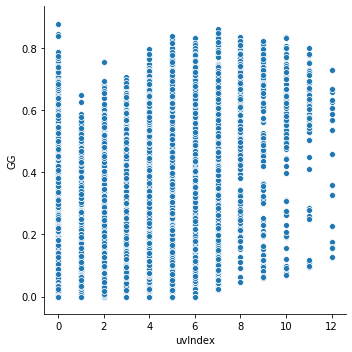

In [81]:
sns.relplot(x= "uvIndex", y= "GG", data=data)

In [82]:
# Basic statistics :

data.describe()

,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility,GC,GG
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,18.237660,18.263350,0.148876,0.090576,10.632348,0.633195,693.214041,3.031832,3.982727,187.312443,1.322945,0.410481,9.159691,0.378977,0.135781
std,5.169219,5.420304,0.746871,0.209571,4.487578,0.154054,474.060931,1.828670,2.662988,105.758347,2.289643,0.329263,2.645891,0.322034,0.217528
min,5.450000,2.990000,0.000000,0.000000,-4.400000,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.370000,14.370000,0.000000,0.000000,7.737500,0.530000,0.000000,1.570000,1.997500,93.000000,0.000000,0.040000,9.988000,0.146000,0.000000
50%,18.290000,18.310000,0.000000,0.000000,10.870000,0.630000,1013.500000,2.750000,3.540000,191.000000,0.000000,0.400000,10.003000,0.245000,0.000000
75%,21.710000,21.760000,0.021300,0.060000,13.620000,0.720000,1019.500000,4.230000,5.320000,283.000000,2.000000,0.750000,10.003000,0.523000,0.206000
max,45.000000,45.670000,31.415000,1.000000,23.850000,0.960000,1033.500000,11.490000,20.720000,359.000000,12.000000,1.000000,16.093000,3.042000,0.879000


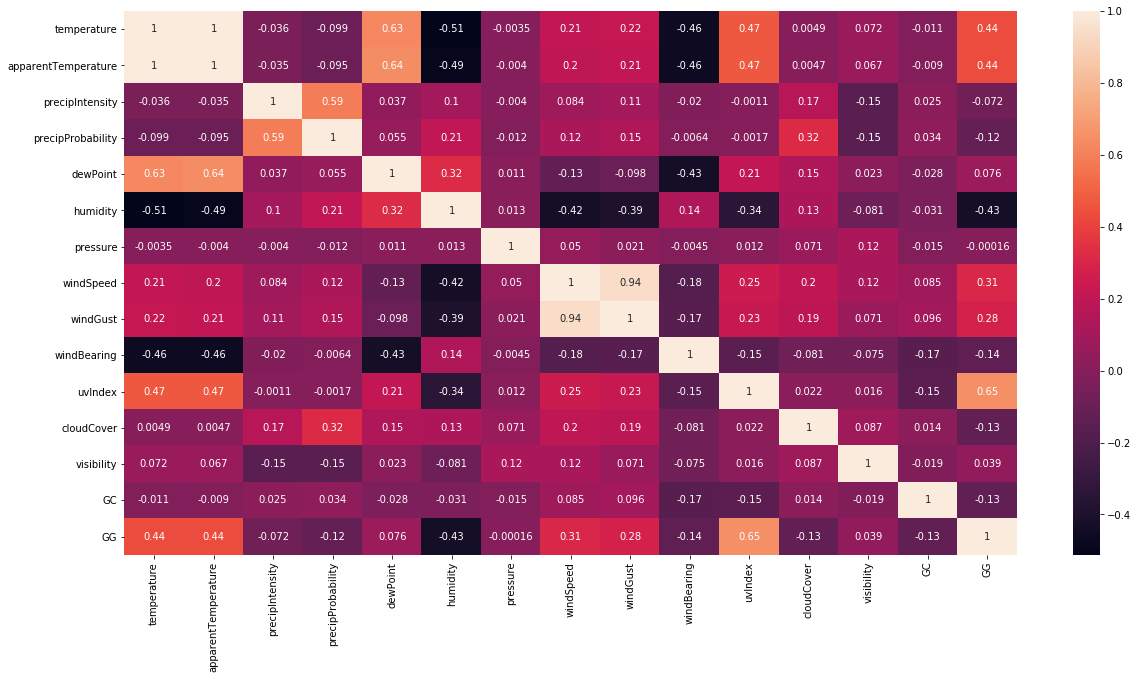

In [83]:
# Checking futures correlation

c = data.corr()

plt.subplots(figsize=(20,10))
sns.heatmap(c, annot=True)

In [84]:
c = data.corr()
abs(c['GC']).sort_values(ascending = False)

GC                     1.000000
windBearing            0.165555
uvIndex                0.147406
GG                     0.133866
windGust               0.096441
windSpeed              0.085491
precipProbability      0.033737
humidity               0.031266
dewPoint               0.027656
precipIntensity        0.024935
visibility             0.018991
pressure               0.014880
cloudCover             0.013899
temperature            0.010628
apparentTemperature    0.008980
Name: GC, dtype: float64

In [85]:
100 * data.isnull().sum() / data.shape[0]

temperature            0.0
apparentTemperature    0.0
precipIntensity        0.0
precipProbability      0.0
dewPoint               0.0
humidity               0.0
pressure               0.0
windSpeed              0.0
windGust               0.0
windBearing            0.0
uvIndex                0.0
cloudCover             0.0
visibility             0.0
GC                     0.0
GG                     0.0
dtype: float64

In [86]:

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

figure = go.Scatter(x=data.index,
                    y=data.GG,
                    name = "Evolution de la conso par mois",
                    line = dict(color = 'blue'),
                    opacity = 0.5)

layout = dict(title='Evolution de la conso par mois',)

fig = dict(data=[figure], layout=layout)
iplot(fig)

In [87]:
july_data_2012 = data["2012-07"]
july_data_2012.head(10)

,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility,GC,GG
date,,,,,,,,,,,,,,,
2012-07-01 00:00:00,10.77,10.77,0.0,0.0,5.48,0.70,1014.8,0.75,0.75,294,0,0.78,9.988,0.353,0.0
2012-07-01 00:30:00,10.77,10.77,0.0,0.0,5.48,0.70,1014.8,0.75,0.75,294,0,0.78,9.988,0.567,0.0
2012-07-01 01:00:00,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.547,0.0
2012-07-01 01:30:00,10.21,10.21,0.0,0.0,5.52,0.73,0.0,0.21,0.61,289,0,1.00,0.000,0.613,0.0
2012-07-01 02:00:00,9.48,9.48,0.0,0.0,5.22,0.75,0.0,0.33,0.95,284,0,0.88,0.000,0.519,0.0
2012-07-01 02:30:00,9.48,9.48,0.0,0.0,5.22,0.75,0.0,0.33,0.95,284,0,0.88,0.000,0.314,0.0
2012-07-01 03:00:00,10.30,10.30,0.0,0.0,5.19,0.71,1014.6,1.20,1.43,318,0,0.77,9.988,0.324,0.0
2012-07-01 03:30:00,10.30,10.30,0.0,0.0,5.19,0.71,1014.6,1.20,1.43,318,0,0.77,9.988,0.301,0.0
2012-07-01 04:00:00,10.47,10.47,0.0,0.0,5.16,0.70,1014.8,1.35,1.99,320,0,1.00,9.988,0.343,0.0


In [88]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

figure = go.Scatter(x=july_data_2012.index,
                    y=july_data_2012.GG,
                    name = "Evolution de la production par mois",
                    line = dict(color = 'blue'),
                    opacity = 0.5)

layout = dict(title='Evolution de la production par mois',)

fig = dict(data=[figure], layout=layout)
iplot(fig)

In [89]:
fig = go.Figure([{
    'x': july_data_2012.index,
    'y': july_data_2012.GC,
    'name': col
}  for col in july_data_2012])

fig.show()

In [90]:
# Separate target variable Y from features X
july_data_2012 = july_data_2012.drop('GC', axis = 1)
july_data_2012

target_name = 'GG'


Y = july_data_2012[target_name]
X = july_data_2012.drop(target_name, axis=1)

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [92]:
# Data normalization

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns = X_train.columns, index= X_train.index)
display(X_train)

#sc_x.fit(X_train)
#X_train= sc_x.transform(X_train)

print("-------------")
X_test = pd.DataFrame(sc_x.transform(X_test), columns = X_test.columns, index=X_test.index)
display(X_test)

,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility
date,,,,,,,,,,,,,
2012-07-19 01:00:00,-1.009066,-0.884654,-0.295792,-0.447383,-1.055458,0.025504,0.729699,-1.198647,-1.217287,0.100842,-0.545744,1.227725,0.398795
2012-07-29 10:00:00,0.629202,0.634445,0.608850,-0.013270,-0.271620,-1.021029,0.739535,0.944395,1.247096,-0.256269,1.652006,-0.796786,0.403526
2012-07-27 23:30:00,-0.645007,-0.493371,-0.295792,-0.447383,-0.817074,-0.148918,0.720887,-0.176110,-0.325163,0.618037,-0.545744,1.579813,0.398795
2012-07-26 23:00:00,0.261892,0.309334,-0.295792,-0.447383,0.625349,0.199926,-1.356426,-1.002712,-0.757975,-2.965389,-0.545744,0.846295,0.403526
2012-07-18 04:00:00,-0.726270,-0.565298,-0.295792,-0.447383,-0.336267,0.461559,0.732568,-0.782285,-0.859554,0.433325,-0.545744,-1.354260,0.398795
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-07-30 20:00:00,-0.037157,0.044643,-0.295792,-0.447383,-0.687781,-0.672185,-1.356426,0.895411,1.211765,-0.046928,-0.545744,0.846295,0.403526
2012-07-22 09:00:00,-0.427221,-0.300607,0.862806,3.730957,-0.336267,0.112715,0.753470,1.054608,0.474216,-0.391725,0.553131,0.875636,0.403526
2012-07-13 03:30:00,0.593446,0.602797,-0.295792,-0.447383,1.494035,0.723192,0.714535,-1.657871,-1.217287,0.987463,-0.545744,0.992999,0.398795


-------------


,temperature,apparentTemperature,precipIntensity,precipProbability,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,uvIndex,cloudCover,visibility
date,,,,,,,,,,,,,
2012-07-30 00:00:00,-1.278861,-1.560768,-0.295792,-0.447383,-0.740307,0.723192,0.739740,-0.151618,-0.320746,0.273240,-0.545744,-0.679423,0.398795
2012-07-21 05:00:00,-0.124922,-0.033038,3.351832,2.537146,1.421308,1.595303,-1.356426,0.479048,0.279892,-0.330155,-0.545744,0.846295,0.403526
2012-07-06 23:30:00,-0.661259,-0.507756,0.136314,-0.176062,-0.166570,0.548770,-1.356426,0.087178,-0.104340,-0.170070,-0.545744,0.846295,0.403526
2012-07-25 09:00:00,-0.908300,-0.726414,-0.295792,-0.447383,1.114237,2.467413,0.741790,-0.145495,-0.466489,0.716551,0.553131,0.875636,-2.120012
2012-07-11 00:30:00,0.570692,0.582657,2.532475,4.273598,1.235449,0.461559,0.730724,-0.274078,-0.258916,-2.706792,-0.545744,0.934317,0.403526
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-07-23 19:00:00,-0.186682,-0.087703,2.644292,1.614655,0.273834,0.374348,0.749372,0.074932,-0.069008,-0.317840,-0.545744,0.846295,0.403526
2012-07-09 17:00:00,0.863240,0.841594,-0.295792,-0.447383,1.162722,0.025504,0.744863,0.087178,0.054653,-2.571336,-0.545744,0.054095,0.567241
2012-07-06 13:30:00,0.681211,0.680478,-0.261046,0.800693,0.867773,-0.061707,0.758184,1.299527,1.185266,-0.625695,1.652006,0.083436,0.403526


## Stat Model (moindres carrés)

In [93]:
import statsmodels.api as sm

model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GG   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     252.5
Date:                Tue, 25 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:28:13   Log-Likelihood:                 1289.8
No. Observations:                1190   AIC:                            -2552.
Df Residuals:                    1176   BIC:                            -2480.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0984      0.002     41.216      0.000       0.094       0.103
temperature             0.2016      0.025      8.107      0.000       0.153       0.250
apparentTemperature    -0.0024      0.015     -0.167      0.868      -0.031       0.026
precipIntensity        -0.0034      0.004     -0.894      0.371      -0.011       0.004
precipProbability       0.0049      0.004      1.217      0.224      -0.003       0.013
dewPoint               -0.1401      0.017     -8.448      0.000      -0.173      -0.108
humidity                0.1331      0.018      7.300      0.000       0.097       0.169
pressure               -0.0019      0.002     -0.790      0.430      -0.007       0.003
windSpeed               0.0442      0.007      6.247      0.000       0.030       0.058
windGust               -0.0289      0.007     -4.247      0.000      -0.042      -0.016
windBearing             0.0154      0.003      5.561      0.000       0.010       0.021
uvIndex                 0.0961      0.003     34.047      0.000       0.091       0.102
cloudCover             -0.0221      0.003     -8.081      0.000      -0.028      -0.017
visibility           6.906e-05      0.002      0.028      0.978      -0.005       0.005
==============================================================================
Omnibus:                      227.839   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.039
Skew:                           0.948   Prob(JB):                    9.74e-153
Kurtosis:                       6.244   Cond. No.                         26.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
model = sm.OLS(Y_test, sm.add_constant(X_test)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GG   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     58.90
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           1.16e-72
Time:                        17:28:13   Log-Likelihood:                 354.95
No. Observations:                 298   AIC:                            -681.9
Df Residuals:                     284   BIC:                            -630.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1001      0.005     21.847      0.000       0.091       0.109
temperature             0.1841      0.048      3.822      0.000       0.089       0.279
apparentTemperature    -0.0003      0.029     -0.009      0.993      -0.057       0.056
precipIntensity        -0.0035      0.007     -0.466      0.641      -0.018       0.011
precipProbability      -0.0008      0.007     -0.116      0.907      -0.014       0.012
dewPoint               -0.1280      0.032     -3.972      0.000      -0.191      -0.065
humidity                0.1315      0.034      3.859      0.000       0.064       0.199
pressure                0.0003      0.005      0.055      0.957      -0.009       0.009
windSpeed               0.0290      0.014      2.068      0.040       0.001       0.057
windGust               -0.0041      0.015     -0.274      0.784      -0.033       0.025
windBearing             0.0139      0.005      2.695      0.007       0.004       0.024
uvIndex                 0.1049      0.006     17.746      0.000       0.093       0.116
cloudCover             -0.0191      0.005     -3.496      0.001      -0.030      -0.008
visibility             -0.0045      0.005     -0.976      0.330      -0.014       0.005
==============================================================================
Omnibus:                       70.908   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.751
Skew:                           0.836   Prob(JB):                     1.72e-84
Kurtosis:                       8.317   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## LinearRegression Model

In [95]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
print(" ")

print("Train score : {}".format(regressor.score(X_train, Y_train)))
print(" ")
print("Test score : {}".format(regressor.score(X_test, Y_test)))

 
Train score : 0.7362079764022327
 
Test score : 0.7194278739131645


In [106]:
y_true = data["GG"]

In [98]:
y_pred = regressor.predict(X_test)
y_pred

array([ 1.12528581e-02,  2.70136447e-02, -2.88825979e-03,  1.38636553e-01,
       -8.23150109e-03,  1.72054280e-02, -2.04027401e-02,  4.20034750e-01,
        1.83382486e-01,  3.52899471e-02,  2.61994475e-02,  2.06865493e-01,
       -5.33664883e-03, -1.68675221e-02,  3.69909739e-03,  1.63198048e-01,
        2.28677681e-01,  1.58750381e-02,  6.13775442e-02,  2.44833748e-02,
        3.17482510e-02,  3.65422786e-02,  2.39962333e-02,  2.45673832e-02,
       -8.22530041e-03, -6.40600063e-03,  2.58029750e-02, -9.08306600e-04,
        2.00026113e-02, -3.48885633e-02,  2.33530455e-02,  3.36708193e-02,
       -1.65295928e-02,  1.60752808e-02,  2.16720717e-01,  6.21114429e-03,
        2.67468550e-01, -1.67888737e-02, -1.92440233e-02, -1.80998746e-02,
       -2.34736794e-02,  1.77716849e-02, -1.19484084e-02,  6.23552443e-02,
       -1.60302707e-03,  1.55738111e-01,  1.33402105e-01,  2.75590978e-01,
        2.39562762e-02,  8.08193850e-03,  1.33996215e-02,  2.40406324e-02,
        2.92242479e-01, -

In [118]:
from sklearn.metrics import r2_score

print("")
display(r2_score(Y_test, y_pred))
print("")

0.7194278739131645

In [122]:
from sklearn.metrics import explained_variance_score
print(" ")
display(explained_variance_score(Y_test, y_pred))
print(" ")

0.7195246771017088

In [119]:
from sklearn.metrics import mean_squared_error
print(" ")
display(mean_squared_error(Y_test, y_pred))
print("")

0.005607068826795213

In [120]:
from sklearn.metrics import mean_absolute_error
print(" ")
display(mean_absolute_error(Y_test, y_pred))

print(" ")
# display(mean_absolute_error(Y_test, y_pred, multioutput=[0.3, 0.7]))

0.048309870350609255

In [121]:
from sklearn.metrics import max_error
print("")
display(max_error(Y_test, y_pred))
print("")

0.32178303458049473

In [56]:
regressor.coef_

array([ 0.20881114, -0.00204004, -0.00367411,  0.00380246, -0.14431592,
        0.13867353, -0.00066813,  0.04828083, -0.02855604,  0.01805268,
        0.09129099, -0.02159322,  0.00091912])

In [57]:
coefs = pd.DataFrame(index=july_data_2012.columns[:-1], data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
temperature,0.208811
apparentTemperature,-0.002040
precipIntensity,-0.003674
precipProbability,0.003802
dewPoint,-0.144316
humidity,0.138674
pressure,-0.000668
windSpeed,0.048281
windGust,-0.028556
windBearing,0.018053


In [58]:
coefs.sort_values(by="coefficients", ascending=False)

,coefficients
temperature,0.208811
humidity,0.138674
uvIndex,0.091291
windSpeed,0.048281
windBearing,0.018053
precipProbability,0.003802
visibility,0.000919
pressure,-0.000668
apparentTemperature,-0.002040
precipIntensity,-0.003674


In [59]:
from sklearn.feature_selection import f_regression

feature_importance = f_regression(X_train, Y_train)


feature_importance

(array([5.24310192e+02, 4.69396056e+02, 8.99922249e+00, 8.81993663e+00,
        7.13430542e+00, 4.12121978e+02, 2.16249172e+00, 1.54655993e+02,
        1.39552423e+02, 1.95649376e-01, 1.60683416e+03, 2.67099810e+01,
        1.29034997e-01]),
 array([2.05877981e-096, 5.48539576e-088, 2.75722601e-003, 3.03940416e-003,
        7.66560760e-003, 6.79185401e-079, 1.41680006e-001, 1.82339751e-033,
        1.58056537e-030, 6.58336216e-001, 6.16368013e-223, 2.77102482e-007,
        7.19498527e-001]))

In [60]:
feature_ranking = pd.DataFrame(columns=july_data_2012.columns[:-1], data=feature_importance,
                               index=["f-score", "p-value"]).transpose().sort_values(["f-score", "p-value"], ascending=False)
feature_ranking

,f-score,p-value
uvIndex,1606.834157,6.163680e-223
temperature,524.310192,2.058780e-96
apparentTemperature,469.396056,5.485396e-88
humidity,412.121978,6.791854e-79
windSpeed,154.655993,1.823398e-33
windGust,139.552423,1.580565e-30
cloudCover,26.709981,2.771025e-07
precipIntensity,8.999222,2.757226e-03
precipProbability,8.819937,3.039404e-03
dewPoint,7.134305,7.665608e-03


C:\Users\FLaude E. BANZA\anaconda3\lib\site-packages\seaborn\axisgrid.py:861: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



<Figure size 1440x576 with 0 Axes>

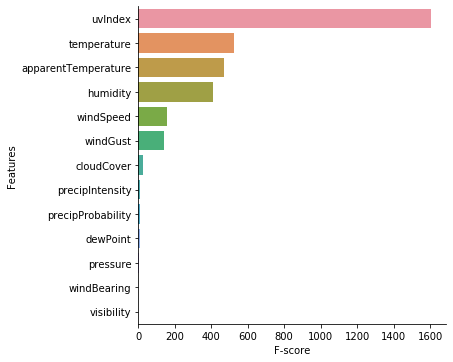

In [61]:
plt.figure(figsize = (20, 8))
ax = sns.catplot(x=feature_ranking.columns[0], y=[index for index in feature_ranking.index],
                 data=feature_ranking, kind="bar", legend=False)
ax.set(xlabel='F-score', ylabel='Features')
plt.show()

## RandomForest 

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [63]:
print(" ")

print("RF_train score : {}".format(rf_regressor.score(X_train, Y_train)))
print(" ")
print("RF_test score : {}".format(rf_regressor.score(X_test, Y_test)))

 
RF_train score : 0.9683249294014356
 
RF_test score : 0.887927023241345


In [68]:
from sklearn.model_selection import GridSearchCV
rf_regressor_grid = RandomForestRegressor()
params = {"n_estimators": range(50, 100, 10),
          "max_depth" : range(10, 50),
          "max_features" : range(5, 13)
          }

regressor = GridSearchCV(cv=10, estimator = rf_regressor_grid, param_grid = params, n_jobs=-1, verbose=3).fit(X_train, Y_train)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

In [69]:
regressor.best_params_

{'max_depth': 25, 'max_features': 5, 'n_estimators': 70}

In [70]:
regressor.best_estimator_.score(X_train, Y_train)

0.9692985442525065

In [71]:
regressor.best_estimator_.score(X_test, Y_test)

0.8947609932619253

## XGboost Model

In [33]:
!pip install xgboost


In [34]:
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(X_train, Y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [35]:
regressor_xgb.score(X_train, Y_train)

0.9793947956568855

In [36]:
regressor_xgb.score(X_test, Y_test)

0.8869153013992173